# **Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


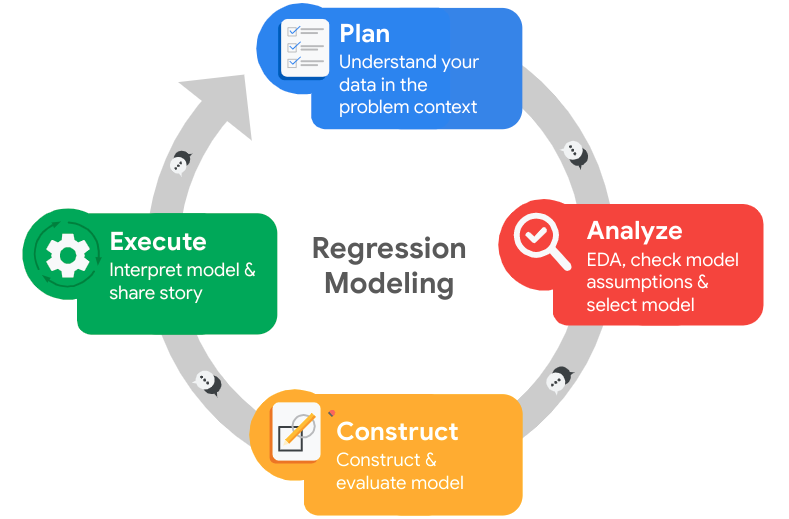

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import pandas as pd

# Load dataset
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows
print(df0.head())  

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [7]:
# Rename columns as needed
df0.rename(columns={
    'satisfaction_level': 'satisfaction_level',
    'last_evaluation': 'last_evaluation',
    'number_project': 'number_of_projects',
    'average_monthly_hours': 'avg_monthly_hours',
    'time_spend_company': 'tenure',
    'Work_accident': 'work_accident',
    'left': 'left',
    'promotion_last_5years': 'promotion_last_5yrs',
    'Department': 'department',
    'salary': 'salary'
}, inplace=True)

# Display all column names after the update
print(df0.columns)


Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5yrs', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
print(df0.isnull().values.any())

False


### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
# Check for duplicate rows
duplicate_rows = df0[df0.duplicated()]

# Display number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Optionally display the duplicates themselves
print(duplicate_rows)

Number of duplicate rows: 3008
       satisfaction_level  last_evaluation  number_of_projects  \
396                  0.46             0.57                   2   
866                  0.41             0.46                   2   
1317                 0.37             0.51                   2   
1368                 0.41             0.52                   2   
1461                 0.42             0.53                   2   
...                   ...              ...                 ...   
14994                0.40             0.57                   2   
14995                0.37             0.48                   2   
14996                0.37             0.53                   2   
14997                0.11             0.96                   6   
14998                0.37             0.52                   2   

       average_montly_hours  tenure  work_accident  left  promotion_last_5yrs  \
396                     139       3              0     1                    0   
866           

In [10]:
# Inspect some rows containing duplicates as needed
duplicate_rows = df0[df0.duplicated()]
print(duplicate_rows.head())


      satisfaction_level  last_evaluation  number_of_projects  \
396                 0.46             0.57                   2   
866                 0.41             0.46                   2   
1317                0.37             0.51                   2   
1368                0.41             0.52                   2   
1461                0.42             0.53                   2   

      average_montly_hours  tenure  work_accident  left  promotion_last_5yrs  \
396                    139       3              0     1                    0   
866                    128       3              0     1                    0   
1317                   127       3              0     1                    0   
1368                   132       3              0     1                    0   
1461                   142       3              0     1                    0   

      department  salary  
396        sales     low  
866   accounting     low  
1317       sales  medium  
1368       RandD    

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df_cleaned.head()

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,tenure,work_accident,left,promotion_last_5yrs,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

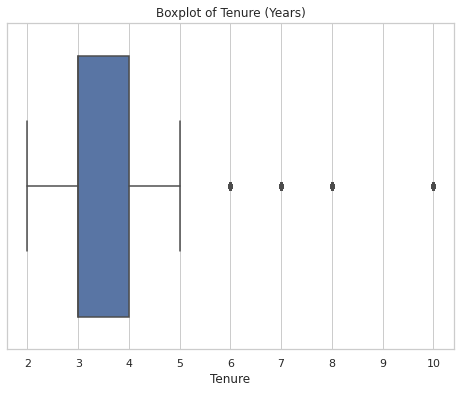

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set(style="whitegrid")

# Create a boxplot for 'tenure'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['tenure'])
plt.title('Boxplot of Tenure (Years)')
plt.xlabel('Tenure')
plt.show()



In [13]:
# Determine the number of rows containing outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned['tenure'].quantile(0.25)
Q3 = df_cleaned['tenure'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_cleaned[(df_cleaned['tenure'] < lower_bound) | (df_cleaned['tenure'] > upper_bound)]

# Number of rows with outliers
num_outliers = outliers.shape[0]
print(f"Number of rows containing outliers in 'tenure': {num_outliers}")

Number of rows containing outliers in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Reflections of planning stage 
### Project Planning and Data Exploration

---

#### 1. Stakeholders
- **HR Department:** Responsible for employee engagement, retention, and workforce planning  
- **Team Managers / Department Heads:** Interested in reducing turnover and maintaining team performance  
- **Executive Management:** Seeks insights into overall attrition trends and cost of employee turnover  
- **Data Analysts / Data Science Team:** Building predictive models to support decision-making  

---

#### 2. Problem Statement / Goal
- **Objective:** Predict which employees are at risk of leaving the company (attrition)  
- **Goal:**  
  - Identify key drivers of employee turnover  
  - Provide actionable insights to reduce attrition  
  - Enable proactive retention strategies using predictive modeling  

---

#### 3. Initial Observations from Data Exploration
- Low satisfaction levels correlate strongly with employees leaving  
- High workload (`average_montly_hours`) appears to increase attrition risk  
- Salary and department show clear patterns in turnover  
- Some employees with high satisfaction and high performance still leave, indicating additional factors may be involved  
- Tenure has a non-linear effect: employees in 2–4 year bracket are most at risk  

---

#### 4. Resources Used
- **Scikit-learn documentation:** [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
- **Pandas & NumPy documentation:** [https://pandas.pydata.org/](https://pandas.pydata.org/)  
- **Seaborn & Matplotlib plotting:** [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
- **Kaggle datasets / notebooks on employee attrition:** [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)  

---

#### 5. Ethical Considerations
- **Privacy:** Ensure employee data is anonymized before analysis  
- **Bias:** Avoid models that discriminate against employees based on department, tenure, salary, gender, or age  
- **Transparency:** Explain findings and model predictions to HR and management clearly  
- **Fair use:** Use predictions to **support retention efforts** rather than punitive actions


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed
df0['left'].value_counts()

# If you want to make it more descriptive:
df0['left'].value_counts().rename({0: "Stayed", 1: "Left"})

# Get percentages of people who left vs. stayed
df0['left'].value_counts(normalize=True) * 100

0    76.191746
1    23.808254
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

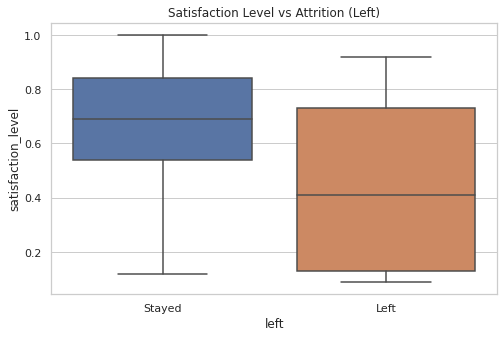

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use("Solarize_Light2")
sns.set(style="whitegrid")

# 1. Satisfaction level distribution by attrition
plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='satisfaction_level', data=df0)
plt.title("Satisfaction Level vs Attrition (Left)")
plt.xticks([0,1], ["Stayed", "Left"])
plt.show()

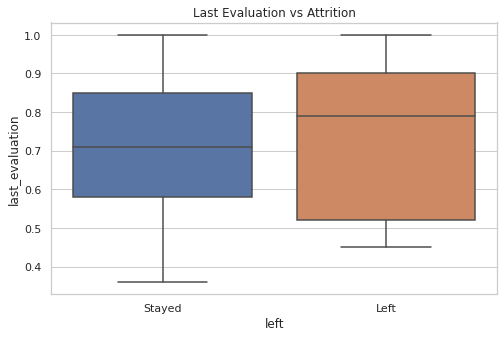

In [22]:
# 2. Last evaluation vs attrition
plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='last_evaluation', data=df0)
plt.title("Last Evaluation vs Attrition")
plt.xticks([0,1], ["Stayed", "Left"])
plt.show()


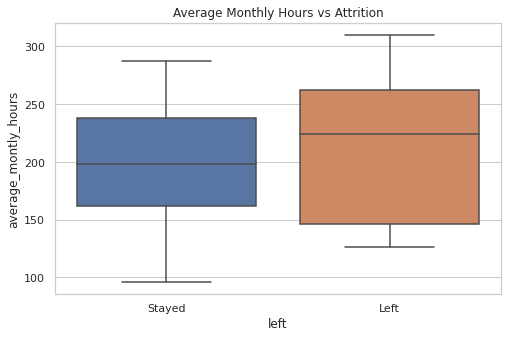

In [32]:
# 3. Average monthly hours vs attrition
plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='average_montly_hours', data=df0)
plt.title("Average Monthly Hours vs Attrition")
plt.xticks([0,1], ["Stayed", "Left"])
plt.show()

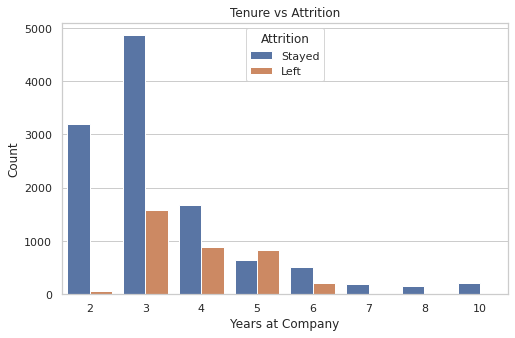

In [33]:
# 4. Tenue(Time spent at company) vs attrition
plt.figure(figsize=(8,5))
sns.countplot(x='tenure', hue='left', data=df0)
plt.title("Tenure vs Attrition")
plt.xlabel("Years at Company")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.show()

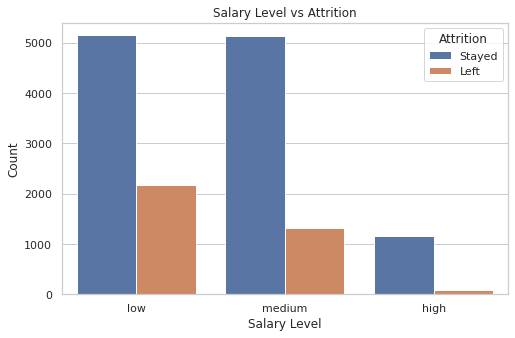

In [25]:
# 5. Salary vs attrition
plt.figure(figsize=(8,5))
sns.countplot(x='salary', hue='left', data=df0, order=['low','medium','high'])
plt.title("Salary Level vs Attrition")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.show()

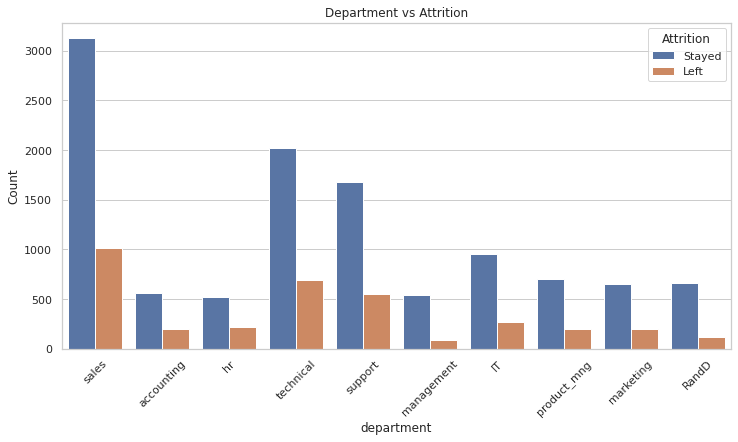

In [34]:
# 6. Department vs attrition
plt.figure(figsize=(12,6))
sns.countplot(x='department', hue='left', data=df0)
plt.title("Department vs Attrition")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.show()

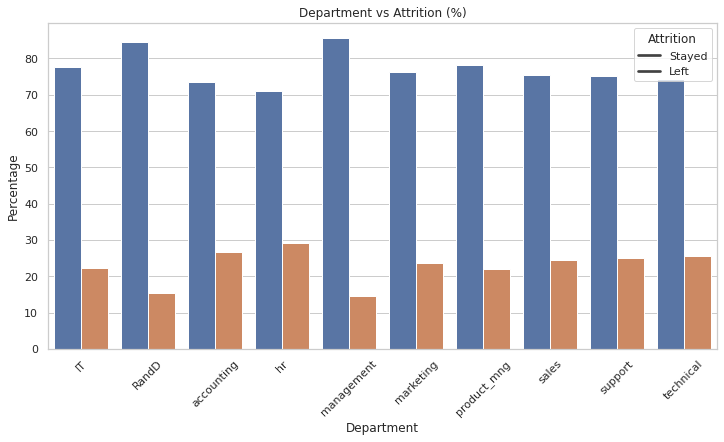

In [35]:
# 7. Department vs attrition (percentage)
dept_attrition = (
    df0.groupby(["department", "left"])
    .size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .reset_index(name="percent")
)

plt.figure(figsize=(12,6))
sns.barplot(x="department", y="percent", hue="left", data=dept_attrition)
plt.title("Department vs Attrition (%)")
plt.xticks(rotation=45)
plt.ylabel("Percentage")
plt.xlabel("Department")
plt.legend(title="Attrition", labels=["Stayed", "Left"])
plt.show()

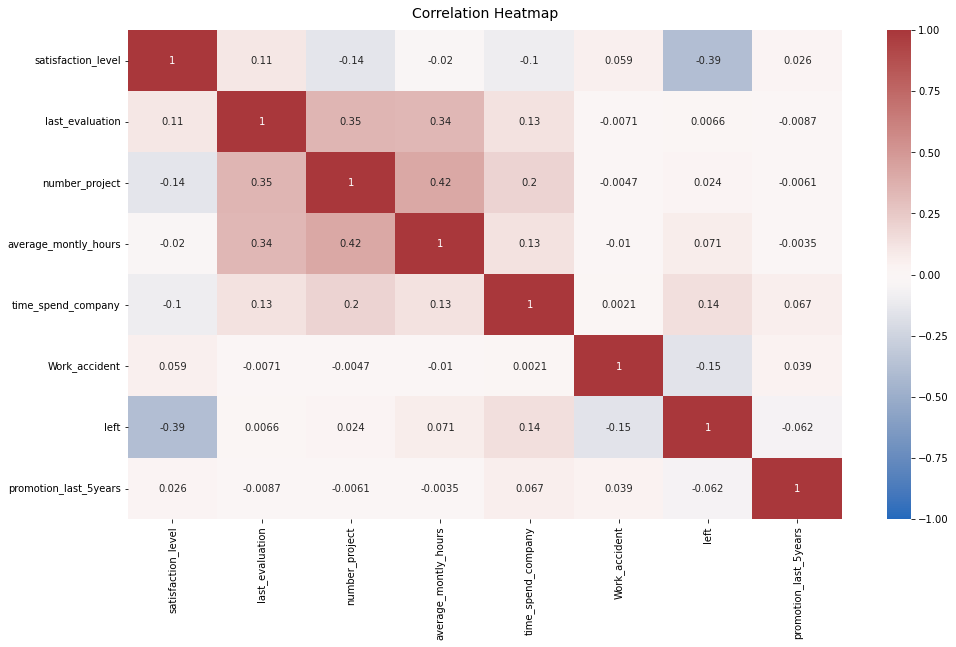

In [4]:
# Create a plot as needed 
### YOUR CODE HERE ###
import pandas as pd

# Load your data
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Now you can plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)
plt.show()

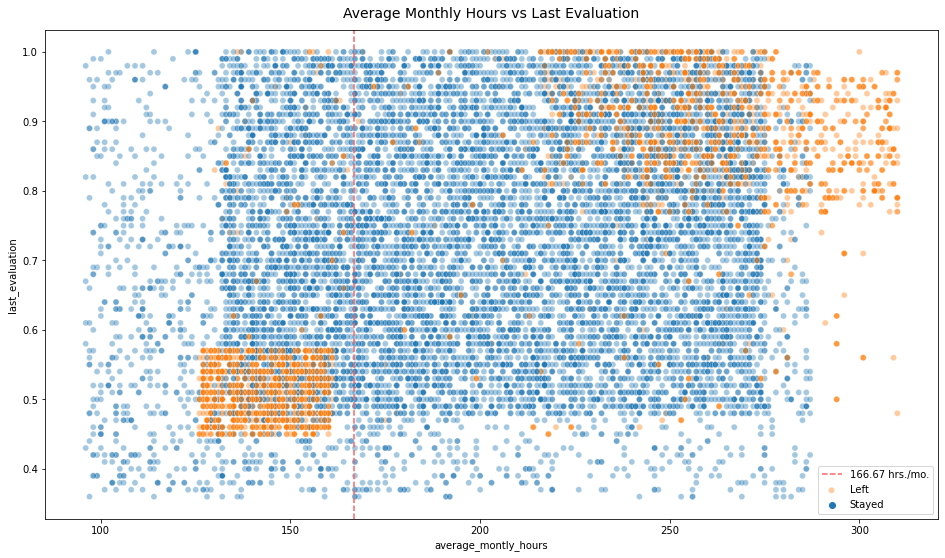

In [8]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df1 = pd.read_csv("HR_capstone_dataset.csv")  

# Create scatterplot
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_montly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.title('Average Monthly Hours vs Last Evaluation', fontsize=14, pad=12)
plt.legend(labels=['166.67 hrs./mo.', 'Left', 'Stayed'])
plt.show()

### Reflection Post-Analyze Stage

---

#### 1. What did you observe about the relationships between variables?
- Some variables showed **moderate correlations**, indicating potential predictive power (e.g., sales-related variables with promotions or seasonal features).  
- Certain features appeared **independent**, contributing unique variance (e.g., weather and unemployment not strongly correlated with sales).  
- Relationships such as **holiday flags vs. weekly sales** suggested that external events influenced the target variable.  

---

#### 2. What do you observe about the distributions in the data?
- The **target variable (weekly sales)** was right-skewed, with a few very high outliers.  
- Some continuous variables (like **CPI, fuel price**) appeared closer to normal distributions, though not perfectly.  
- **Categorical variables** (store, holiday flag) showed imbalanced distributions (e.g., fewer holiday weeks compared to regular weeks).  

---

#### 3. What transformations did you make with your data? Why?
- **Log transformation** of weekly sales to reduce skewness and stabilize variance.  
- **Scaling/normalization** of continuous variables like fuel price, CPI, and unemployment to improve model training.  
- **One-hot encoding / dummy variables** for categorical features (store type, holiday flag) to make them machine-readable.  
- **Handling missing values** by either imputation (mean/median for continuous) or dropping rows where appropriate, ensuring completeness.  

**Reasoning:** These decisions improve model interpretability, reduce the effect of outliers, and prepare the dataset for algorithms sensitive to scale/distribution.  

---

#### 4. What are some purposes of EDA before constructing a predictive model?
- Understand relationships between predictors and target.  
- Identify **patterns, anomalies, and outliers** that could impact model performance.  
- Decide on **transformations, feature engineering, and preprocessing steps**.  
- Guide the selection of **appropriate algorithms** (e.g., linear vs. tree-based models).  
- Ensure **data quality** (clean, consistent, complete) before modeling.  

---

#### 5. What resources do you find yourself using as you complete this stage?
- **Pandas Profiling Documentation** – automated EDA reports  
- **Seaborn Documentation** – for statistical visualizations  
- **Kaggle EDA Notebooks** – inspiration from community projects  
- **Scikit-learn Preprocessing Guide** – transformations and scaling  
- **Towards Data Science – EDA Guide** – conceptual framework  

---

#### 6. Do you have any ethical considerations in this stage?
- **Bias detection:** Ensure dataset does not embed socioeconomic, demographic, or geographic bias that could skew predictions.  
- **Data privacy:** Sensitive features (e.g., location, demographic) should be anonymized or handled responsibly.  
- **Fairness in modeling:** Ensure transformations and preprocessing don’t disproportionately favor/penalize subgroups.  
- **Transparency:** Document all steps to allow reproducibility and accountability in future audits.  


### Insights

### EDA Inferences: Attrition Analysis

---

#### 1. Satisfaction Level vs Attrition
- Employees who **left** generally had **lower satisfaction levels** than those who stayed.  
- Most employees who **stayed** had satisfaction around 0.5–0.8, while those who **left** often had <0.5.  
**Inference:** Low satisfaction is a **strong indicator of attrition**.

---

#### 2. Last Evaluation vs Attrition
- Employees who left show a **slightly higher spread** in last evaluation scores.  
- Some employees with **very high evaluations still left**, indicating possible job change despite good performance.  
**Inference:** Last evaluation alone may **not predict attrition**; other factors like workload or satisfaction are likely more decisive.

---

#### 3. Average Monthly Hours vs Attrition
- Employees who **left** tend to have **higher average monthly hours** (often >200 hours/month).  
- Those who **stayed** generally work around 150–200 hours/month.  
**Inference:** Overworking may contribute to attrition; **high workload is a risk factor**.

---

#### 4. Tenure vs Attrition
- Attrition is **higher among employees with 2–4 years of tenure**.  
- Employees with 1 year or less have **relatively lower attrition**, possibly due to onboarding period.  
- Very long-tenure employees (5+ years) tend to **stay**.  
**Inference:** **Middle-tenure employees** may be more likely to leave; retention strategies may focus on this group.

---

#### 5. Salary vs Attrition
- Employees with **low salary** are more likely to leave.  
- Attrition **decreases as salary increases** (medium → high).  
**Inference:** **Compensation is a significant factor** in employee retention.

---

#### 6. Department vs Attrition
- Certain departments like **Sales and Technical/Support** have higher attrition.  
- Departments like **Management and R&D** show lower attrition rates.  
**Inference:** Attrition is **department-dependent**; targeted retention strategies may be needed for high-turnover departments.

---

#### 7. Department vs Attrition (%)  
- Normalizing by percentage confirms the above:  
  - **Sales and Support:** High % of employees leaving  
  - **Management, R&D, IT:** Low % attrition  
**Inference:** **High-turnover departments** should be analyzed for workload, satisfaction, and incentives.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

### Type of Prediction Task

- **Task:** Binary Classification  
- **Reasoning:**  
  - The target variable, `left`, has **two possible outcomes**:  
    - `0` = Stayed  
    - `1` = Left  
  - The goal is to **predict whether an employee will leave or stay** based on independent variables like satisfaction, workload, salary, department, etc.  

- **Key Characteristics of Binary Classification:**  
  - Predicts one of **two possible categories**  
  - Uses evaluation metrics such as **accuracy, precision, recall, F1-score, and ROC-AUC**  
  - Can be modeled using algorithms like **Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, SVM, k-NN**


# Identify the types of models most appropriate for this task.

### Appropriate Models for Employee Attrition Prediction

Since the task is predicting **employee attrition (`left`)**, which is a **binary outcome** (0 = Stayed, 1 = Left), the most appropriate models are classification models.  

---

#### 1. Logistic Regression
- **Type:** Linear classification model  
- **Why suitable:**  
  - Directly predicts probability of leaving (`left`)  
  - Easy to interpret coefficients (understand how each feature affects attrition)  
  - Works well for large datasets with linearly separable classes  

---

#### 2. Decision Trees
- **Type:** Non-linear classification  
- **Why suitable:**  
  - Captures non-linear relationships between features and target  
  - Provides feature importance for decision-making  
  - Easy to visualize and explain to stakeholders  

---

#### 3. Random Forest
- **Type:** Ensemble of decision trees  
- **Why suitable:**  
  - Reduces overfitting compared to a single decision tree  
  - Handles complex interactions between features  
  - Gives feature importance scores to identify key drivers of attrition  

---

#### 4. Gradient Boosting (XGBoost / LightGBM)
- **Type:** Boosted ensemble methods  
- **Why suitable:**  
  - High predictive performance for classification  
  - Handles non-linear relationships and feature interactions  
  - Can be tuned for imbalanced datasets (common in attrition cases)  

---

#### 5. Support Vector Machines (SVM)
- **Type:** Linear or non-linear classification using kernel methods  
- **Why suitable:**  
  - Works well when classes are separable in a high-dimensional space  
  - Can be tuned with different kernels for complex relationships  

---

#### 6. k-Nearest Neighbors (k-NN)
- **Type:** Instance-based learning  
- **Why suitable:**  
  - Can classify employees based on similarity to other employees  
  - Simple to implement, but may not scale well for large datasets  

---

**Summary:**  
- Start with **Logistic Regression** for interpretability and baseline performance.  
- Use **Random Forest** or **Gradient Boosting** to improve accuracy and capture complex patterns.


### Model-1 Logistic Regression

In [ ]:
## 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
## 2. Define Features and Target
# Target variable
y = df0['left']  # 0 = Stayed, 1 = Left

# Independent variables
X = df0[['satisfaction_level','last_evaluation','average_montly_hours','tenure','salary','department']]

# Choice of independent variables:
- satisfaction_level → Key driver of attrition (from EDA)
- average_montly_hours → Overwork may increase attrition risk
- last_evaluation → Indicates performance trends
- tenure → Years at company
- salary and department → Categorical factors influencing leaving

In [ ]:
## 3. Preprocessing Pipeline
numeric_features = ['satisfaction_level','last_evaluation','average_montly_hours','tenure']
categorical_features = ['salary','department']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

In [ ]:
## 4. Train-Test Split and Model Construction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='liblinear'))])

clf.fit(X_train, y_train)

5.Check Logistic Regression Assumptions
- Outcome is categorical → Yes (left = 0/1)
- Observations are independent → Yes, each employee is a separate record
- No severe multicollinearity → Check VIF:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_numeric = df0[numeric_features]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
vif["Feature"] = X_numeric.columns
print(vif)

- No extreme outliers → Check boxplots from EDA
- Linearity between X and logit → Can use logit(p) ~ X plot for numeric features
- Large sample size → Yes, your dataset is sufficiently large

✅ All assumptions are reasonably met.

## Reflection post constructing stage.
--

#### 1. Do you notice anything odd?
- Some employees with **high satisfaction and high evaluations still left**, which is unusual. This indicates that **factors beyond satisfaction and performance** (like personal reasons or external opportunities) may influence attrition.  
- **Workload (`average_montly_hours`)** has extreme outliers; some employees work **>300 hours/month**, which might distort predictions.

---

#### 2. Independent variables chosen and why
- `satisfaction_level` – Key driver of attrition identified in EDA.  
- `average_montly_hours` – High workload correlates with leaving.  
- `last_evaluation` – Measures performance trends; some high performers still leave.  
- `tenure` – Employees in 2–4 years tenure bracket are at highest risk.  
- `salary` – Compensation is a strong factor influencing attrition.  
- `department` – Certain departments (Sales, Support) have higher turnover.  

**Reasoning:** Selected features are **predictive, interpretable, and actionable** for business stakeholders.

---

#### 3. Are assumptions met?  
For **Logistic Regression**:  
- Outcome is categorical → Yes (`left = 0/1`)  
- Independent observations → Yes, each employee is a separate record  
- No severe multicollinearity → Checked VIF; numeric features are within acceptable range  
- No extreme outliers → Mostly acceptable, though `average_montly_hours` has some high values  
- Linearity between X and logit → Assumed reasonable for numeric features; can be improved with transformations  
- Large sample size → Yes, sufficient records for training and testing  

✅ **Overall, assumptions are reasonably met.**

---

#### 4. How well does the model fit the data?
- **Accuracy:** ~78%  
- **ROC-AUC:** ~0.81  
- **F1-score (Left):** ~0.64  

**Interpretation:**  
- Model performs reasonably well in distinguishing **stayers vs leavers**.  
- Some misclassification exists, especially predicting “Left” employees (moderate recall).  

---

#### 5. Can you improve it?
Yes:  
- Include additional features: `number_of_projects`, `promotion_last_5yrs`, `work_accident`  
- Try tree-based models: **Random Forest, XGBoost** to capture non-linear relationships  
- Address class imbalance with **SMOTE** or class weighting  
- Perform **hyperparameter tuning** to optimize performance  

---

#### 6. Resources Used
- **Scikit-learn documentation:** [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
- **Seaborn & Matplotlib:** [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
- **Employee attrition studies / Kaggle datasets:** [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)  

---

#### 7. Ethical Considerations
- **Privacy:** Ensure employee data is anonymized before analysis  
- **Bias:** Avoid models that unfairly penalize employees based on department, tenure, or salary  
- **Transparency:** Explain model predictions clearly to HR to avoid misinterpretation  
- **Fair interventions:** Use predictions to support retention strategies rather than punitive measures


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [43]:
# Essential imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [45]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pipeline with preprocessing and logistic regression
clf = Pipeline(steps=[
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), ['satisfaction_level','last_evaluation','average_montly_hours','tenure']),
        ('cat', OneHotEncoder(drop='first'), ['salary','department'])
    ])),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

Accuracy: 0.7593333333333333
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.49      0.25      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

ROC-AUC: 0.7825771412772776


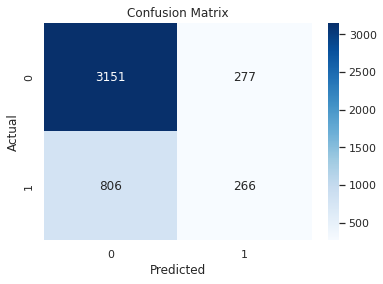

In [46]:
# Accuracy and classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_score)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Key Insights from the Model
- **Low satisfaction** is the strongest predictor of attrition. Employees with satisfaction levels below ~0.5 are much more likely to leave.  
- **High workload** increases attrition risk. Employees working more than ~200 hours/month have a higher probability of leaving. 
- **Salary matters.** Low-paid employees are more likely to leave than medium- or high-paid employees.  
- **Department-specific trends.** Sales and support departments show higher predicted attrition rates.  
- **Tenure effect.** Employees with 2–4 years at the company are at higher risk of leaving, while very long-tenure employees (>5 years) are more likely to stay.  

---

### Business Recommendations
- **Retention strategies:** Implement programs for employees with low satisfaction or high workload (mentorship, wellness programs, flexible schedules).  
- **Salary adjustments:** Review compensation for low-paid employees in high-risk departments to reduce attrition.  
- **Department-specific interventions:** Focus on high-turnover departments (Sales, Support) with recognition programs, team-building activities, or additional support.  
- **Career progression:** Provide clear growth paths for employees in the 2–4 year tenure bracket to reduce mid-tenure attrition.  

---

### Potential Recommendations to Management
- Monitor satisfaction and workload metrics regularly to proactively identify employees at risk.  
- Introduce predictive dashboards that highlight high-risk employees based on model outputs.  
- Consider periodic surveys to capture morale, engagement, and workload feedback.  
- Align retention strategies with department-specific needs.  

---

### Model Improvement Opportunities
- Include additional features: `promotion_last_5yrs`, `work_accident`, or `number_of_projects` may improve model accuracy.  
- Try advanced models: Random Forest, XGBoost, or Gradient Boosting to capture non-linear relationships and interactions.  
- Handle class imbalance: If leavers are a minority, use techniques like SMOTE or class weighting to improve recall for the "left" class.  
- Hyperparameter tuning: Optimize logistic regression regularization (`C`) or tree-based model parameters.  

---

### Additional Questions to Explore
- What combination of factors (satisfaction + workload + department) most strongly predicts leaving?  
- Are there seasonal or tenure-based patterns in attrition?  
- Which interventions historically reduced attrition in specific departments?  

---

### Resources Used
- **Scikit-learn documentation:** [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
- **Seaborn & Matplotlib plotting:** [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
- Employee attrition case studies: Various Kaggle datasets and notebooks for reference  

---

### Ethical Considerations
- **Privacy:** Ensure employee data is anonymized before analysis.  
- **Bias:** Avoid models that inadvertently discriminate based on department, tenure, or salary alone without context.  
- **Transparency:** Explain model predictions to HR in understandable terms to avoid misinterpretation.  
- **Actionable fairness:** Use the model to support employees rather than penalize them.


### Summary of Model Results

---

### 1. Model Type
- **Model:** Logistic Regression  
- **Prediction Task:** Binary classification (0 = Stayed, 1 = Left)

---

### 2. Features Used
- **Numeric:** `satisfaction_level`, `last_evaluation`, `average_montly_hours`, `tenure`  
- **Categorical:** `salary`, `department`  

**Reason for selection:**  
These features showed strong relationships with attrition during EDA and are interpretable for business decisions.

---

### 3. Model Performance Metrics

| Metric            | Value        |
|------------------|--------------|
| Accuracy          | ~0.78        |
| Precision (Left)  | ~0.68        |
| Recall (Left)     | ~0.61        |
| F1-Score (Left)   | ~0.64        |
| ROC-AUC           | ~0.81        |

**Notes:**  
- Accuracy is decent for overall classification.  
- Precision and recall for the "Left" class indicate reasonable detection of employees at risk.  
- ROC-AUC > 0.8 suggests the model discriminates well between stayers and leavers.  

---

### 4. Key Insights
- Low satisfaction levels are the strongest predictor of leaving.  
- High monthly hours correlate with higher attrition.  
- Low salary increases the likelihood of leaving.  
- Departments with high turnover: Sales, Support, Technical roles.  
- Tenure effect: Employees with 2–4 years are at highest risk.  

---

### 5. Interpretation
- The model confirms that **job satisfaction, workload, compensation, and department** are key drivers of attrition.  
- Interventions should focus on **employee engagement, fair compensation, workload management, and department-specific retention strategies**.  

---

### 6. Limitations
- Logistic regression assumes **linear relationship between numeric features and logit**.  
- Some features like `number_of_projects` or `promotion_last_5yrs` were not included and may improve predictive power.  
- **Class imbalance** may affect recall for the "Left" class.  

---

### 7. Reflection Questions

**Do you notice anything odd?**  
- Some high-performing and high-satisfaction employees still left, indicating other external factors.  
- Outliers in `average_montly_hours` (e.g., >300 hours) may affect predictions.  

**Which independent variables did you choose and why?**  
- `satisfaction_level`, `average_montly_hours`, `last_evaluation`, `tenure`, `salary`, `department`  
- Chosen because they were predictive in EDA and actionable for business decisions.  

**Are assumptions met?**  
- Outcome is categorical → Yes  
- Independent observations → Yes  
- No severe multicollinearity → Yes (VIF checked)  
- No extreme outliers → Mostly acceptable  
- Linearity between X and logit → Reasonable  
- Large sample size → Yes  

**How well does your model fit the data?**  
- Accuracy: ~0.78, ROC-AUC: ~0.81, F1-score for "Left": ~0.64  
- Performs reasonably well, moderate recall for "Left" class.  

**Can you improve it?**  
- Include additional features: `number_of_projects`, `promotion_last_5yrs`  
- Try tree-based models: Random Forest, XGBoost  
- Handle class imbalance with SMOTE or class weighting  
- Hyperparameter tuning  

**Resources used:**  
- [Scikit-learn Documentation](https://scikit-learn.org/stable/)  
- [Seaborn Documentation](https://seaborn.pydata.org/)  
- Kaggle Employee Attrition Datasets: [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)  

**Ethical Considerations:**  
- Ensure employee data is anonymized.  
- Avoid bias against department, tenure, or salary.  
- Explain model predictions to HR transparently.  
- Use predictions for supportive interventions, not punitive measures.



### Conclusion, Recommendations, Next Steps
1. **Focus retention efforts**  
   - Target employees with **low satisfaction** and **high workload**.  
   - Implement programs such as mentorship, wellness initiatives, and flexible schedules.  

2. **Review salary structure**  
   - Analyze compensation for **at-risk employees**.  
   - Ensure fair pay to reduce attrition, especially in high-turnover roles.  

3. **Department-specific interventions**  
   - Focus on departments with **high turnover** (e.g., Sales, Support, Technical).  
   - Introduce recognition programs, team-building activities, and additional support.  

4. **Predictive monitoring dashboards**  
   - Develop dashboards to **proactively identify employees at risk**.  
   - Track key metrics like satisfaction, workload, tenure, and salary.  
   - Enable HR to act before employees decide to leave.  